In [4]:
import scipy.io
import pandas as pd
import mat4py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sympy import *
import math
import sympy as sy
from sympy import Sum
import random

# Loading in Data and Converting to Pandas DataFrame

In [5]:
mat_array = mat4py.loadmat('/Users/trebu/Downloads/vis_data.mat')

In [6]:
mat_dataframe = pd.DataFrame(mat_array)

In [7]:
mat_dataframe

,W
0,"[0.063072899261157, 0.09561849433129076, 0.126..."
1,"[0.5418410089232286, -0.05661396345396874, 0.0..."
2,"[0.9577197116363646, 1.2987560774209057, 1.342..."
3,"[-0.29945018584613553, 0.4505579792830716, 0.8..."
4,"[-0.046393278991246956, 0.019225775228446984, ..."
...,...
533,"[0.6657944213665705, 0.6711047226810104, 0.516..."
534,"[0.617734153974393, 0.4444045865757713, 0.4208..."
535,"[-0.2904368973431904, 0.5975676827371156, 0.97..."
536,"[-0.05203732989309018, 0.28845052434953444, 0...."


In [8]:
w1 = []
w2 = []
w3 = []
for i in range(0,len(mat_dataframe)):
    list_values = mat_dataframe["W"][i]
    w1.append(list_values[0])
    w2.append(list_values[1])
    w3.append(list_values[2])
new_mat_dataframe = pd.DataFrame()
new_mat_dataframe["w1"] = w1
new_mat_dataframe["w2"] = w2
new_mat_dataframe["w3"] = w3

In [9]:
new_mat_dataframe

,w1,w2,w3
0,0.063073,0.095618,0.126411
1,0.541841,-0.056614,0.067160
2,0.957720,1.298756,1.342079
3,-0.299450,0.450558,0.808990
4,-0.046393,0.019226,0.869677
...,...,...,...
533,0.665794,0.671105,0.516802
534,0.617734,0.444405,0.420828
535,-0.290437,0.597568,0.970739
536,-0.052037,0.288451,0.041013


# Problem 2: With This Problem, You Will Improve Your Simulation Skills and Test Your Understanding of Random Variables

## (i) Develop a function that applies the fundamental theorem of simulation and simulates draws Categorical 

### Summation Function Which Will be Used Inside the `categorical` Function

In [21]:
def summation(values=None):
    ssum = 0
    summation = []
    for i in range(len(values)):
        ssum = ssum + values[i]
        summation.append(ssum)
    return summation

In [22]:
def categorical(outcomes=[],probabilities=[]):
    
    C_sigmam = summation(probabilities) ##Starting by forming C_Sigma
    u=np.random.uniform(0,1,1)    ##Generating u
    for i in range(len(C_sigmam)):
        print(i)
        if(u < C_sigmam[i]): ##Finding lowest u such that u<C_m
            s = outcomes[i]## Assigning outcome to s
            break ## Breaking out of the for loop and returning s
                
        else:
            continue
    
    
    return s

## (ii)  Use Simulations to Verify That the Function you Developed in (i) Simulates Variables With the Correct Statistics

To show the capabilities of the `categorical` function I decided to use a 6-sided dice as my example. I pass in 6 outcomes which were generated below, and I pass in six 1/6 probabilties.

### Creating `out` Variable to Pass to the `outcomes` Argument Within the `categorical` Function

In [ ]:
out = random.sample(range(1, 7), 6)

### Creating `prob` Variable to Pass to the `probabilities` Argument Within the `categorical` Function

In [ ]:
prob = []
for i in range(len(out)):
    prob.append(1/6)
prob

### Using a For Loop to Simulate 20,000 Runs

In [ ]:
s_outcome = []
for i in range(20000):
    s_outcome.append(categorical(out,prob))

In [ ]:
s = pd.DataFrame(s_outcome)

### Creating Figure to Show Distribution of 20,000 Simulated Runs

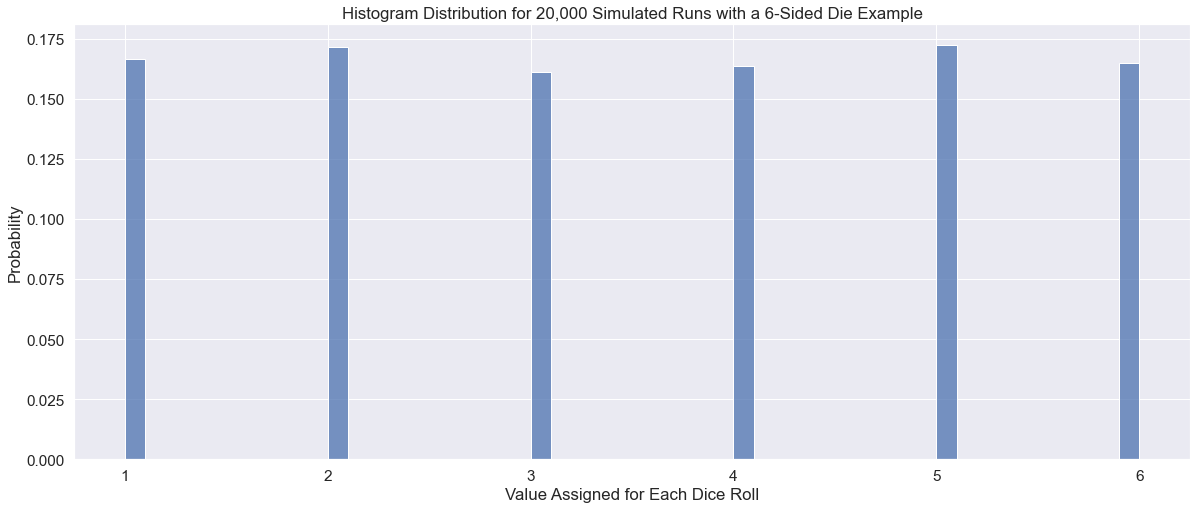

In [40]:
sns.set(font_scale=1.4)
fig, ax1 = plt.subplots(1,1,figsize=(20,8))
ax1 = sns.histplot(data=s, x=0,ax=ax1,stat="probability",bins=50)
ax1.set_title('Histogram Distribution for 20,000 Simulated Runs with a 6-Sided Die Example')
ax1.set_xlabel("Value Assigned for Each Dice Roll")
sns.set_style("darkgrid")
plt.savefig('hist_dist_dice_roll.png',bbox_inches="tight")